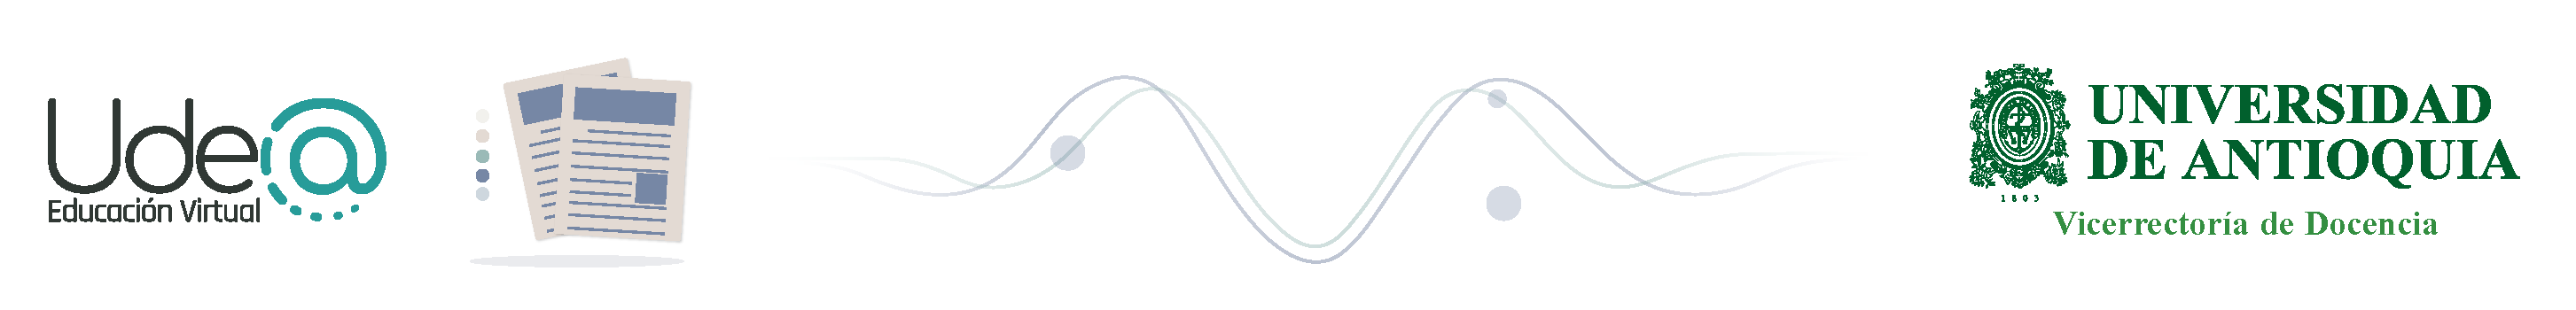

# Computer Vision Intro



**Tratamiento de Señales III**

*Prof. Hernán Felipe García Arias*

*Facultad de Ingeniería*

*Universidad de Antioquia*

*2023-1*

## Numpy Tutorial and Introduction

Images can be represented as **matrices** (2D arrays) or 3D **tensors** (in order to get RGB channels). [OpenCV](https://opencv.org/), a popular Computer Vision package, is a great tool to work with images, and provides a lot really useful tools that you can use to edit, transform, and work with your images. Python's OpenCV is actually a **wrapper** on top of the C/C++ implementation of the library, which makes it really fast. In addition, everything in OpenCV can be converted to and from [Numpy](http://www.numpy.org/) arrays, a really nice way to work with multidimensional objects like matrices and tensors. Like OpenCV, all Python calls to the Numpy library actually get converted and executed into C, which makes it really fast as well.

As we work through things like camera matrices, calibration, homography matrices, etc, it'll be important to know how to work with these libraries, and understand what you can (and can't do with them).


In [ ]:
!wget "https://www.duckietown.org/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg" -O dt.jpg

import numpy as np

--2024-08-23 16:33:23--  https://www.duckietown.org/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg
Resolving www.duckietown.org (www.duckietown.org)... 104.21.92.144, 172.67.195.50
Connecting to www.duckietown.org (www.duckietown.org)|104.21.92.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.duckietown.com/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg [following]
--2024-08-23 16:33:23--  https://www.duckietown.com/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg
Resolving www.duckietown.com (www.duckietown.com)... 172.67.205.80, 104.21.22.143, 2606:4700:3033::ac43:cd50, ...
Connecting to www.duckietown.com (www.duckietown.com)|172.67.205.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154909 (151K) [image/jpeg]
Saving to: ‘dt.jpg’

dt.jpg              100%[===================>] 151.28K  --.-KB/s    in 0.04s   

2024-08-23 16:33:23 (3.43 MB/s) - ‘dt.jpg’ saved [154909/154909

## OpenCV


In [ ]:
cv2.imread?

<class 'numpy.ndarray'>


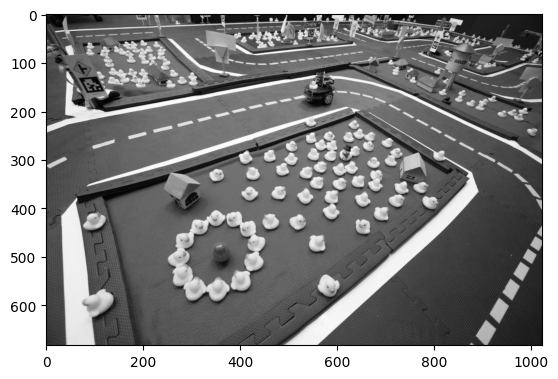

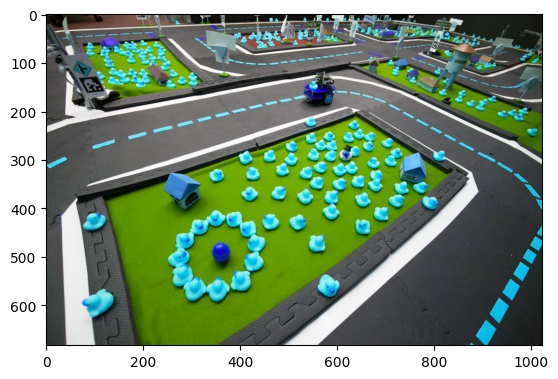

(683, 1024) (683, 1024, 3)


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2


# Load in Grayscale
img = cv2.imread('./dt.jpg', 0) # Flag = 0 , lee la imagen en escala de grises
img1= img
# The underlying representation is a numpy array!
print(type(img))

plt.imshow(img,cmap='gray')
plt.show()

img2 = cv2.imread('./dt.jpg')

plt.imshow(img2)
plt.show()

# This would work normally, but it will crash the colab kernel, so don't.
# cv2.imshow('Image', img) # run locally


print(img.shape,img2.shape)

Notice anything different about the above image? You'll see that the colors are off - this is because OpenCV uses a BGR ordering of their image channels, whereas when you want to plot in something other than OpenCV, you'll need to convert it. In Colab, you cannot use the standard OpenCV 'imshow' function, so we use matplotlib.

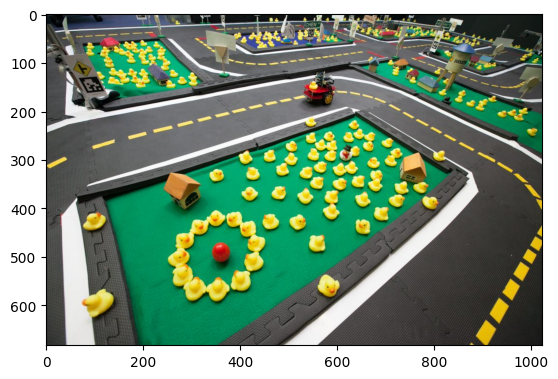

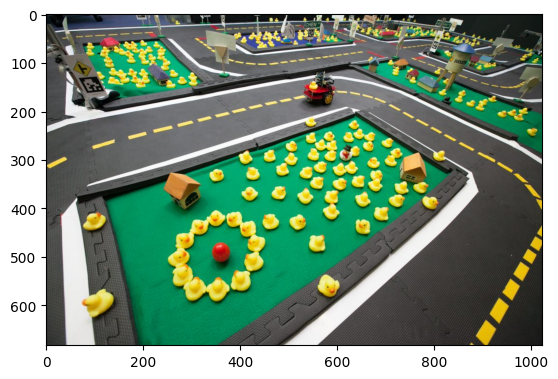

In [ ]:
imgrgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(imgrgb)
plt.show()
# (683, 1024, 0) : se refiere a la paleta azul
# (683, 1024, 1) : paleta verde
# (683, 1024, 2) : paleta roja
# Or, use fun numpy functions / indexing!
imgrgb = img2[:,:,::-1]
plt.imshow(imgrgb)
plt.show()


In [ ]:
array = img2[0:5,0,0]
print(array)

[42 44 32 29 36]


In [ ]:
array[::-1]

array([36, 29, 32, 44, 42], dtype=uint8)

### Common Image Manipulations

OpenCV is super useful for doing lots of image transformations, and we will experiment with some of the basic ones below.

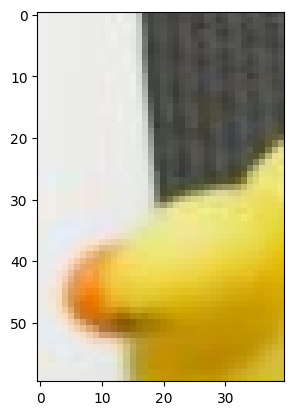

In [ ]:
zoomRES2 = imgrgb[550:610,70:110,:]
plt.imshow(zoomRES2)
plt.show()

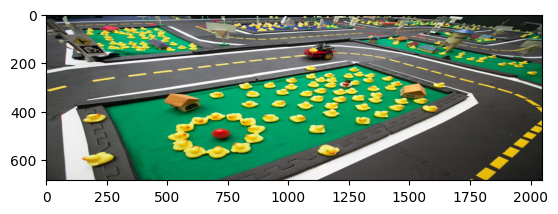

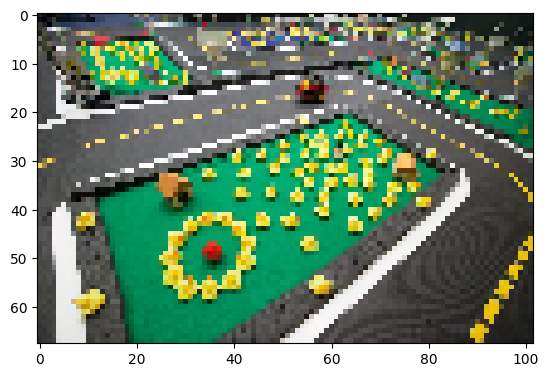

In [ ]:
# Expanding
res1 = cv2.resize(imgrgb, None,fx=2, fy=1, interpolation = cv2.INTER_CUBIC) #fx and fy, scale factor
plt.imshow(res1)
plt.show()

# Shrinking
res2 = cv2.resize(imgrgb, None,fx=.1, fy=.1, interpolation = cv2.INTER_CUBIC)
plt.imshow(res2)
plt.show()

# What are some practical constraints that have to do with image resizing?

$\begin{align}
\begin{bmatrix}
x_{new} \\
y_{new}\\
1
\end{bmatrix}=
\begin{bmatrix}
cos(\theta)&-sin(\theta)&t_x \\
sin(\theta)& cos(\theta)& t_y\\
0&0&1
\end{bmatrix}
\end{align}
\begin{bmatrix}
x_{old} \\
y_{old}\\
1
\end{bmatrix}
$



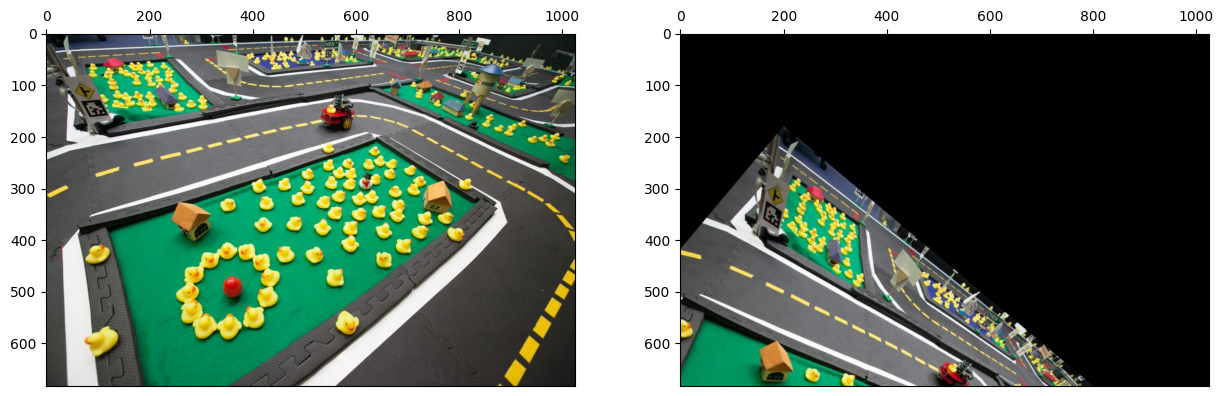

In [ ]:
from IPython.core.pylabtools import figsize
#@title Transformation Parameters { run: "auto" }

theta_degrees = 40 #@param {type:"slider", min:-180, max:180, step:10}
shift_x = 80 #@param {type:"slider", min:-100, max:500, step:20}
shift_y = 400 #@param {type:"slider", min:-100, max:500, step:20}

# We can also play around with rotations by defining our M matrix,
# which has the form:
"""
| cos(theta) -sin(theta) tx |
| sin(theta)  cos(theta) ty |
"""
rows = cols = 0
rows, cols, _ = imgrgb.shape

radians = theta_degrees * np.pi / 180
M = [
        [np.cos(radians), -np.sin(radians), shift_x],
        [np.sin(radians),  np.cos(radians), shift_y]
     ]

M = np.array(M)
#rows += int(shift_x)
#cols += int(shift_y)

#res = cv2.warpAffine(imgrgb, M, (cols*2,rows*2))
res = cv2.warpAffine(imgrgb, M, (cols,rows))

fig, ax = plt.subplots(nrows = 1 , ncols = 2, figsize=(15,30))

ax[0].imshow(imgrgb)
ax[0].xaxis.set_ticks_position('top')
ax[0].xaxis.set_label_position('top')
ax[1].imshow(res)
ax[1].xaxis.set_ticks_position('top')
ax[1].xaxis.set_label_position('top')
plt.show()




In [ ]:
x_ini = 0
y_ini = 683
tx = 0
ty = 0

theta = -30.0* np.pi/180.0

x_new = round(np.cos(theta)*x_ini - np.sin(theta)*y_ini + tx)
y_new = round(np.sin(theta)*x_ini + np.cos(theta)*y_ini + ty)

print('newX: ',round(x_new),'\tnewY: ',round(y_new))

newX:  341 	newY:  591


In [ ]:
# Transformación afín de rotación
angulo = -30
radians = angulo * np.pi / 180
myM = [
        [np.cos(radians), -np.sin(radians), 0],
        [np.sin(radians),  np.cos(radians), 0],
        [0, 0, 1]
    ]

posx = 0
posy = 683
vect1 = np.array([posx,posy,1.])
newPos = np.array(myM).dot(vect1)

print(newPos)

[341.5        591.49535078   1.        ]


# Widgets tutorials


 https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html